In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
from tqdm import tqdm 

In [2]:
df = pd.read_csv("features_50_100.csv")
df 

,id,eye,stimuli,color,glaucoma,mean_window_50_0,std_window_50_0,median_window_50_0,max_window_50_0,min_window_50_0,...,std_window_100_26,median_window_100_26,max_window_100_26,min_window_100_26,range_window_100_26,IQR_window_100_26,Q1_window_100_26,Q3_window_100_26,kurtosis_window_100_26,skewness_window_100_26
0,C001,left,ramp,white,no,33.233702,19.870581,29.165282,60.572493,10.000000,...,16.530944,55.875806,63.524532,10.000000,53.524532,12.557260,43.678068,56.235328,0.082570,-1.335345
1,C001,left,ramp,blue,no,54.801834,7.457179,56.462238,57.416459,13.402000,...,12.704317,54.304483,78.488327,10.837809,67.650518,1.876106,52.844029,54.720135,2.291014,-1.790707
2,C001,left,ramp,green,no,55.186039,5.784269,55.880359,68.521255,20.023360,...,11.525011,55.587336,66.911400,10.007051,56.904349,1.041976,54.933230,55.975206,4.640643,-2.400916
3,C001,left,flash,white,no,50.753054,15.557146,56.509845,80.000000,11.077743,...,15.948908,56.387945,62.685928,10.171413,52.514515,11.608063,45.340697,56.948760,-0.239943,-1.224524
4,C001,left,flash,blue,no,47.545593,15.580917,55.304546,80.000000,10.388611,...,12.707170,55.829964,62.747673,10.634277,52.113397,1.397660,55.061753,56.459414,4.310715,-2.428606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,S020,right,flash,red,yes,48.162405,10.844362,51.866347,62.190289,11.731321,...,4.507230,50.725680,54.326439,27.016525,27.309914,1.780917,49.875347,51.656264,11.955890,-3.407693
652,S020,right,ramp,red,yes,51.051313,2.988132,51.567226,55.032780,37.716240,...,4.370799,48.626534,51.997658,28.749388,23.248270,3.701179,46.549435,50.250614,5.190801,-2.271046
653,S020,right,flash,white,yes,51.257405,6.308352,52.392627,53.833977,10.000000,...,12.398607,52.063454,54.528568,10.000000,44.528568,2.099070,50.638334,52.737404,3.793093,-2.286424
654,S020,right,ramp,green,yes,31.144068,18.953234,36.986803,54.678856,10.000000,...,11.313388,49.967390,52.434868,10.000000,42.434868,1.106624,49.297920,50.404544,5.613658,-2.707160


In [3]:
df.dtypes

id                         object
eye                        object
stimuli                    object
color                      object
glaucoma                   object
                           ...   
IQR_window_100_26         float64
Q1_window_100_26          float64
Q3_window_100_26          float64
kurtosis_window_100_26    float64
skewness_window_100_26    float64
Length: 907, dtype: object

In [4]:
print(df.columns.tolist())

['id', 'eye', 'stimuli', 'color', 'glaucoma', 'mean_window_50_0', 'std_window_50_0', 'median_window_50_0', 'max_window_50_0', 'min_window_50_0', 'range_window_50_0', 'IQR_window_50_0', 'Q1_window_50_0', 'Q3_window_50_0', 'kurtosis_window_50_0', 'skewness_window_50_0', 'mean_window_50_1', 'std_window_50_1', 'median_window_50_1', 'max_window_50_1', 'min_window_50_1', 'range_window_50_1', 'IQR_window_50_1', 'Q1_window_50_1', 'Q3_window_50_1', 'kurtosis_window_50_1', 'skewness_window_50_1', 'mean_window_50_2', 'std_window_50_2', 'median_window_50_2', 'max_window_50_2', 'min_window_50_2', 'range_window_50_2', 'IQR_window_50_2', 'Q1_window_50_2', 'Q3_window_50_2', 'kurtosis_window_50_2', 'skewness_window_50_2', 'mean_window_50_3', 'std_window_50_3', 'median_window_50_3', 'max_window_50_3', 'min_window_50_3', 'range_window_50_3', 'IQR_window_50_3', 'Q1_window_50_3', 'Q3_window_50_3', 'kurtosis_window_50_3', 'skewness_window_50_3', 'mean_window_50_4', 'std_window_50_4', 'median_window_50_4', '

In [200]:
# Lista de columnas adicionales que quieres conservar
#additional_columns = ['id', 'eye', 'stimuli', 'color', 'glaucoma']

# Seleccionar las columnas que van desde 50_0 hasta 50_14
#pattern_columns = [col for col in df.columns if '50_' in col and int(col.split('_')[-1]) <= 14]

# Combinar las columnas seleccionadas con las columnas adicionales
#selected_columns = additional_columns + pattern_columns

# Crear un nuevo dataframe con las columnas seleccionadas
#df_selected = df[selected_columns]

# Mostrar las primeras filas del dataframe seleccionado
#df_selected.head()

,id,eye,stimuli,color,glaucoma,mean_window_50_0,std_window_50_0,median_window_50_0,max_window_50_0,min_window_50_0,...,Q3_window_50_13,mean_window_50_14,std_window_50_14,median_window_50_14,max_window_50_14,min_window_50_14,range_window_50_14,IQR_window_50_14,Q1_window_50_14,Q3_window_50_14
0,C001,left,ramp,white,0,32.233702,21.220448,29.165282,60.572493,0.000000,...,31.493153,32.542614,1.027304,32.249439,34.517437,31.136570,3.380867,1.514904,31.697360,33.212264
1,C001,left,ramp,blue,0,54.801834,7.457179,56.462238,57.416459,13.402000,...,25.610007,24.180124,3.738143,25.026102,25.862329,0.000000,25.862329,0.644458,24.658390,25.302848
2,C001,left,ramp,green,0,55.186039,5.784269,55.880359,68.521255,20.023360,...,34.850234,34.544660,0.699974,34.629436,36.062810,33.197536,2.865274,1.018261,34.093526,35.111786
3,C001,left,flash,white,0,50.753054,15.557146,56.509845,80.000000,11.077743,...,55.207252,53.163536,7.964327,55.013068,69.071053,14.750408,54.320645,0.643071,54.614230,55.257301
4,C001,left,flash,blue,0,47.545593,15.580917,55.304546,80.000000,10.388611,...,51.471113,43.186415,14.899464,51.411627,58.071033,10.783411,47.287623,11.282030,41.198513,52.480543


In [5]:
total_nulls = df.isnull().sum().sum()
print(f"Total de valores nulos en el dataset: {total_nulls}")

Total de valores nulos en el dataset: 58


In [6]:
# Verificar si el DataFrame tiene valores nulos
def check_nulls(dataset):
    nulls = dataset.isnull().sum()
    print("Valores nulos por columna:")
    print(nulls[nulls > 0])  # Mostrar solo las columnas con valores nulos
    return nulls[nulls > 0]

nulls = check_nulls(df)

Valores nulos por columna:
kurtosis_window_50_0     1
skewness_window_50_0     1
kurtosis_window_50_1     1
skewness_window_50_1     1
kurtosis_window_50_2     1
skewness_window_50_2     1
kurtosis_window_50_8     1
skewness_window_50_8     1
kurtosis_window_50_12    2
skewness_window_50_12    2
kurtosis_window_50_13    1
skewness_window_50_13    1
kurtosis_window_50_14    2
skewness_window_50_14    2
kurtosis_window_50_15    1
skewness_window_50_15    1
kurtosis_window_50_16    1
skewness_window_50_16    1
kurtosis_window_50_17    1
skewness_window_50_17    1
kurtosis_window_50_18    1
skewness_window_50_18    1
kurtosis_window_50_19    1
skewness_window_50_19    1
kurtosis_window_50_21    1
skewness_window_50_21    1
kurtosis_window_50_22    1
skewness_window_50_22    1
kurtosis_window_50_30    1
skewness_window_50_30    1
kurtosis_window_50_35    1
skewness_window_50_35    1
kurtosis_window_50_36    1
skewness_window_50_36    1
kurtosis_window_50_41    2
skewness_window_50_41    2
k

In [7]:
# Eliminar columnas que contienen cualquier valor NaN
df = df.dropna(axis=1)
nulls = check_nulls(df)

Valores nulos por columna:
Series([], dtype: int64)


In [201]:
# Eliminar columnas que contienen cualquier valor NaN
#df_selected = df_selected.dropna(axis=1)
#nulls = check_nulls(df_selected)

Valores nulos por columna:
Series([], dtype: int64)


In [8]:
pd.set_option('future.no_silent_downcasting', True)
df = df.replace({'yes': 1, 'no': 0})

# Convertir la columna 'glaucoma' a tipo numérico
df['glaucoma'] = df['glaucoma'].astype(int)

# Verificar el tipo de dato de la columna
print(df.dtypes['glaucoma'])

int32


In [202]:
#pd.set_option('future.no_silent_downcasting', True)
#df_selected = df_selected.replace({'yes': 1, 'no': 0})

# Convertir la columna 'glaucoma' a tipo numérico
#df_selected['glaucoma'] = df_selected['glaucoma'].astype(int)

# Verificar el tipo de dato de la columna
#print(df_selected.dtypes['glaucoma'])

int32


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Supongamos que tienes un dataset cargado
# dataset = pd.read_csv('path_to_your_dataset.csv')

# Primero, obtener los ids únicos
unique_ids = df['id'].unique()

# Realizar el train_test_split a nivel de id
train_ids, test_ids = train_test_split(unique_ids, test_size=0.2, random_state=26)

# Filtrar el df original usando los ids seleccionados
train_set = df[df['id'].isin(train_ids)]
test_set = df[df['id'].isin(test_ids)]

# Verifica los tamaños de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {len(train_set)}")
print(f"Tamaño del conjunto de prueba: {len(test_set)}")

Tamaño del conjunto de entrenamiento: 512
Tamaño del conjunto de prueba: 144


In [203]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Supongamos que tienes un dataset cargado
# dataset = pd.read_csv('path_to_your_dataset.csv')

# Primero, obtener los ids únicos
#unique_ids = df_selected['id'].unique()

# Realizar el train_test_split a nivel de id
#train_ids, test_ids = train_test_split(unique_ids, test_size=0.2, random_state=42)

# Filtrar el df_selected original usando los ids seleccionados
#train_set = df_selected[df_selected['id'].isin(train_ids)]
#test_set = df_selected[df_selected['id'].isin(test_ids)]

# Verifica los tamaños de los conjuntos
#print(f"Tamaño del conjunto de entrenamiento: {len(train_set)}")
#print(f"Tamaño del conjunto de prueba: {len(test_set)}")

Tamaño del conjunto de entrenamiento: 512
Tamaño del conjunto de prueba: 144


In [10]:
y_train = train_set.loc[:, 'glaucoma']
y_test = test_set.loc[:, 'glaucoma']
labels = df.loc[:, 'glaucoma']

In [11]:
print(y_train)
print(y_test)

0      0
1      0
2      0
3      0
4      0
      ..
651    1
652    1
653    1
654    1
655    1
Name: glaucoma, Length: 512, dtype: int32
80     0
81     0
82     0
83     0
84     0
      ..
635    1
636    1
637    1
638    1
639    1
Name: glaucoma, Length: 144, dtype: int32


In [12]:
# distribución original
labels.value_counts() / labels.count() * 100

glaucoma
0    51.219512
1    48.780488
Name: count, dtype: float64

In [13]:
# conjunto de entrenamiento
y_train.value_counts() / y_train.count() * 100

glaucoma
0    50.0
1    50.0
Name: count, dtype: float64

In [14]:
# conjunto de pruebas
y_test.value_counts() / y_test.count() * 100

glaucoma
0    55.555556
1    44.444444
Name: count, dtype: float64

In [15]:
df 

,id,eye,stimuli,color,glaucoma,mean_window_50_0,std_window_50_0,median_window_50_0,max_window_50_0,min_window_50_0,...,std_window_100_26,median_window_100_26,max_window_100_26,min_window_100_26,range_window_100_26,IQR_window_100_26,Q1_window_100_26,Q3_window_100_26,kurtosis_window_100_26,skewness_window_100_26
0,C001,left,ramp,white,0,33.233702,19.870581,29.165282,60.572493,10.000000,...,16.530944,55.875806,63.524532,10.000000,53.524532,12.557260,43.678068,56.235328,0.082570,-1.335345
1,C001,left,ramp,blue,0,54.801834,7.457179,56.462238,57.416459,13.402000,...,12.704317,54.304483,78.488327,10.837809,67.650518,1.876106,52.844029,54.720135,2.291014,-1.790707
2,C001,left,ramp,green,0,55.186039,5.784269,55.880359,68.521255,20.023360,...,11.525011,55.587336,66.911400,10.007051,56.904349,1.041976,54.933230,55.975206,4.640643,-2.400916
3,C001,left,flash,white,0,50.753054,15.557146,56.509845,80.000000,11.077743,...,15.948908,56.387945,62.685928,10.171413,52.514515,11.608063,45.340697,56.948760,-0.239943,-1.224524
4,C001,left,flash,blue,0,47.545593,15.580917,55.304546,80.000000,10.388611,...,12.707170,55.829964,62.747673,10.634277,52.113397,1.397660,55.061753,56.459414,4.310715,-2.428606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,S020,right,flash,red,1,48.162405,10.844362,51.866347,62.190289,11.731321,...,4.507230,50.725680,54.326439,27.016525,27.309914,1.780917,49.875347,51.656264,11.955890,-3.407693
652,S020,right,ramp,red,1,51.051313,2.988132,51.567226,55.032780,37.716240,...,4.370799,48.626534,51.997658,28.749388,23.248270,3.701179,46.549435,50.250614,5.190801,-2.271046
653,S020,right,flash,white,1,51.257405,6.308352,52.392627,53.833977,10.000000,...,12.398607,52.063454,54.528568,10.000000,44.528568,2.099070,50.638334,52.737404,3.793093,-2.286424
654,S020,right,ramp,green,1,31.144068,18.953234,36.986803,54.678856,10.000000,...,11.313388,49.967390,52.434868,10.000000,42.434868,1.106624,49.297920,50.404544,5.613658,-2.707160


In [16]:
df.dtypes

id                         object
eye                        object
stimuli                    object
color                      object
glaucoma                    int32
                           ...   
IQR_window_100_26         float64
Q1_window_100_26          float64
Q3_window_100_26          float64
kurtosis_window_100_26    float64
skewness_window_100_26    float64
Length: 855, dtype: object

In [17]:
# Hacer copias de train_set y test_set sin las columnas 'id' y 'glaucoma'
X_train = train_set.drop(columns=['id', 'glaucoma']).copy()
X_test = test_set.drop(columns=['id', 'glaucoma']).copy()

# Verifica los resultados
X_train.head()
X_test.head()

,eye,stimuli,color,mean_window_50_0,std_window_50_0,median_window_50_0,max_window_50_0,min_window_50_0,range_window_50_0,IQR_window_50_0,...,std_window_100_26,median_window_100_26,max_window_100_26,min_window_100_26,range_window_100_26,IQR_window_100_26,Q1_window_100_26,Q3_window_100_26,kurtosis_window_100_26,skewness_window_100_26
80,left,flash,white,48.028871,3.438241,48.560675,49.471325,24.263174,25.208151,0.507587,...,4.035974,47.660384,50.941021,11.348204,39.592817,0.944985,47.020283,47.965268,59.286652,-7.323115
81,left,ramp,blue,48.765703,0.550107,48.697527,49.973816,47.364156,2.609660,0.766486,...,6.511050,48.496475,51.827747,12.360950,39.466798,2.037832,46.858138,48.895970,10.863204,-3.255208
82,left,ramp,green,43.352069,9.980620,47.712851,49.544987,10.353314,39.191672,5.660464,...,0.814372,47.897901,48.932554,45.511505,3.421048,1.128984,47.135446,48.264430,-0.398427,-0.657350
83,left,flash,blue,44.258256,9.748336,48.187747,50.292229,10.578691,39.713538,4.552871,...,4.804153,48.752137,50.361275,15.820082,34.541193,1.181851,48.058875,49.240726,21.758773,-4.399399
84,left,ramp,red,48.461515,4.974673,48.902808,56.539295,15.578682,40.960613,1.032838,...,1.558354,40.574913,43.103207,38.370092,4.733115,2.953623,39.204361,42.157984,-1.567590,0.112462


In [18]:
numeric = X_train.select_dtypes(["float64", "int32"]).columns
categorical = X_train.select_dtypes(["object"]).columns

In [19]:
print(categorical)

Index(['eye', 'stimuli', 'color'], dtype='object')


In [20]:
print(numeric)

Index(['mean_window_50_0', 'std_window_50_0', 'median_window_50_0',
       'max_window_50_0', 'min_window_50_0', 'range_window_50_0',
       'IQR_window_50_0', 'Q1_window_50_0', 'Q3_window_50_0',
       'mean_window_50_1',
       ...
       'std_window_100_26', 'median_window_100_26', 'max_window_100_26',
       'min_window_100_26', 'range_window_100_26', 'IQR_window_100_26',
       'Q1_window_100_26', 'Q3_window_100_26', 'kurtosis_window_100_26',
       'skewness_window_100_26'],
      dtype='object', length=850)


In [21]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Definir las columnas numéricas y categóricas
numeric = X_train.select_dtypes(["float64", "int32"]).columns
categorical = X_train.select_dtypes(["object"]).columns

# Pipelines para columnas numéricas y categóricas
numeric_transformations = Pipeline([
    ('scaler', MinMaxScaler())  # Escalado MinMax para columnas numéricas
])

categoric_transformations = Pipeline([
    ('category_one_hot', OneHotEncoder(sparse_output=False, handle_unknown="ignore"))  # Codificación OneHot para categóricas
])

# Preprocessor: combinación de los pipelines numéricos y categóricos
preprocessor = ColumnTransformer(transformers=[
    ('numerical', numeric_transformations, numeric),
    ('categorical', categoric_transformations, categorical)
])

In [59]:
# Aplicar el preprocessor (ajustar y transformar el conjunto de entrenamiento)
X_train_transformed = preprocessor.fit_transform(X_train)

# Obtener las categorías nuevas creadas por el OneHotEncoder
onehot_columns = preprocessor.named_transformers_['categorical'].named_steps['category_one_hot'].get_feature_names_out(categorical)

# Crear las columnas finales: numéricas + categóricas codificadas
final_columns = list(numeric) + list(onehot_columns)

# Convertir los datos transformados en un DataFrame para visualizar
X_train_trans = pd.DataFrame(X_train_transformed, columns=final_columns)

# Ver las primeras filas del DataFrame transformado
X_train_trans.head()

,mean_window_50_0,std_window_50_0,median_window_50_0,max_window_50_0,min_window_50_0,range_window_50_0,IQR_window_50_0,Q1_window_50_0,Q3_window_50_0,mean_window_50_1,...,kurtosis_window_100_26,skewness_window_100_26,eye_left,eye_right,stimuli_flash,stimuli_ramp,color_blue,color_green,color_red,color_white
0,0.431185,0.965878,0.348297,0.722464,0.000000,0.722464,0.976105,0.082677,0.866437,0.722293,...,0.021448,0.470172,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.831460,0.362482,0.844373,0.677378,0.063716,0.628778,0.012326,0.843782,0.841593,0.785176,...,0.045298,0.443991,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.838590,0.281164,0.833799,0.836018,0.187727,0.692827,0.031845,0.829000,0.842719,0.765725,...,0.070673,0.408908,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.756320,0.756208,0.845238,1.000000,0.020185,0.984604,0.026281,0.841991,0.851051,0.807981,...,0.017965,0.476544,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.696794,0.757364,0.823334,1.000000,0.007278,0.994448,0.382689,0.549922,0.849779,0.689666,...,0.067110,0.407316,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [60]:
# Aplicar el preprocessor (ajustar y transformar el conjunto de entrenamiento)
X_test_transformed = preprocessor.fit_transform(X_test)

# Obtener las categorías nuevas creadas por el OneHotEncoder
onehot_columns = preprocessor.named_transformers_['categorical'].named_steps['category_one_hot'].get_feature_names_out(categorical)

# Crear las columnas finales: numéricas + categóricas codificadas
final_columns = list(numeric) + list(onehot_columns)

# Convertir los datos transformados en un DataFrame para visualizar
X_test_trans = pd.DataFrame(X_test_transformed, columns=final_columns)

# Ver las primeras filas del DataFrame transformado
X_test_trans.head()

,mean_window_50_0,std_window_50_0,median_window_50_0,max_window_50_0,min_window_50_0,range_window_50_0,IQR_window_50_0,Q1_window_50_0,Q3_window_50_0,mean_window_50_1,...,kurtosis_window_100_26,skewness_window_100_26,eye_left,eye_right,stimuli_flash,stimuli_ramp,color_blue,color_green,color_red,color_white
0,0.674324,0.166490,0.628602,0.432023,0.284674,0.369050,0.009241,0.695069,0.593651,0.579547,...,1.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.692434,0.021884,0.631621,0.441372,0.745740,0.030819,0.015418,0.695372,0.600190,0.655120,...,0.205015,0.298270,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.559381,0.494060,0.609894,0.433394,0.007052,0.578341,0.132185,0.599273,0.594158,0.626232,...,0.020129,0.488753,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.581653,0.482430,0.620373,0.447296,0.011550,0.586152,0.105758,0.633508,0.611422,0.671361,...,0.383891,0.214375,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.684957,0.243417,0.636151,0.563521,0.111343,0.604817,0.021773,0.697131,0.608761,0.640639,...,0.000934,0.545197,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [23]:
X_train.head()

,eye,stimuli,color,mean_window_50_0,std_window_50_0,median_window_50_0,max_window_50_0,min_window_50_0,range_window_50_0,IQR_window_50_0,...,std_window_100_26,median_window_100_26,max_window_100_26,min_window_100_26,range_window_100_26,IQR_window_100_26,Q1_window_100_26,Q3_window_100_26,kurtosis_window_100_26,skewness_window_100_26
0,left,ramp,white,33.233702,19.870581,29.165282,60.572493,10.000000,50.572493,43.426828,...,16.530944,55.875806,63.524532,10.000000,53.524532,12.557260,43.678068,56.235328,0.082570,-1.335345
1,left,ramp,blue,54.801834,7.457179,56.462238,57.416459,13.402000,44.014458,0.548367,...,12.704317,54.304483,78.488327,10.837809,67.650518,1.876106,52.844029,54.720135,2.291014,-1.790707
2,left,ramp,green,55.186039,5.784269,55.880359,68.521255,20.023360,48.497896,1.416761,...,11.525011,55.587336,66.911400,10.007051,56.904349,1.041976,54.933230,55.975206,4.640643,-2.400916
3,left,flash,white,50.753054,15.557146,56.509845,80.000000,11.077743,68.922257,1.169259,...,15.948908,56.387945,62.685928,10.171413,52.514515,11.608063,45.340697,56.948760,-0.239943,-1.224524
4,left,flash,blue,47.545593,15.580917,55.304546,80.000000,10.388611,69.611389,17.025806,...,12.707170,55.829964,62.747673,10.634277,52.113397,1.397660,55.061753,56.459414,4.310715,-2.428606


In [64]:
total_nulls = X_train.isnull().sum().sum()
print(f"Total de valores nulos en el dataset: {total_nulls}")

Total de valores nulos en el dataset: 0


In [111]:
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score

def plot_training(model, X_test, y_test):
    y_pred = model.predict(X_test)
    predictions = [round(value, 2) for value in y_pred]

    # Evaluamos los modelos
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

    results = model.evals_result()
    epochs = len(results['validation_0']['error'])

    # Log Loss Plot
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=list(range(epochs)), y=results['validation_0']['logloss'],
                             mode='lines', name='Train Log Loss'))
    fig.add_trace(go.Scatter(x=list(range(epochs)), y=results['validation_1']['logloss'],
                             mode='lines', name='Test Log Loss'))
    fig.update_layout(title='XGBoost Log Loss Over Epochs',
                      template='simple_white',
                      xaxis_title='Epoch',
                      yaxis_title='Log Loss',
                      legend_title='Dataset')
    fig.show()

    # Classification Error Plot
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=list(range(epochs)), y=results['validation_0']['error'],
                             mode='lines', name='Train Error'))
    fig.add_trace(go.Scatter(x=list(range(epochs)), y=results['validation_1']['error'],
                             mode='lines', name='Test Error'))
    fig.update_layout(title='XGBoost Classification Error Over Epochs',
                      template='simple_white',
                      xaxis_title='Epoch',
                      yaxis_title='Classification Error',
                      legend_title='Dataset')
    fig.show()

## Baseline

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier  # Ejemplo con un modelo Dummy (puedes reemplazar con otros modelos)
from sklearn.model_selection import cross_validate

# Definir el modelo Dummy para probar el ciclo (puedes cambiar por otro clasificador)
dummy_model = DummyClassifier(strategy="most_frequent")

# Crear el pipeline con el preprocesador y el modelo
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', dummy_model)  # Reemplaza esto con cualquier modelo que desees usar
])

# Definir las métricas a calcular
scoring = ['f1_macro', 'accuracy', 'roc_auc']

# Validación cruzada con múltiples métricas
cv_results = cross_validate(pipeline, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

# Mostrar resultados
print("F1-Score por fold:", cv_results['test_f1_macro'])
print("ROC-AUC por fold:", cv_results['test_roc_auc'])
print("Exactitud por fold:", cv_results['test_accuracy'])
print("Promedio F1-Score:", cv_results['test_f1_macro'].mean())
print("Promedio Exactitud:", cv_results['test_accuracy'].mean())

F1-Score por fold: [0.33116883 0.33116883 0.33333333 0.33333333 0.33333333]
ROC-AUC por fold: [0.5 0.5 0.5 0.5 0.5]
Exactitud por fold: [0.49514563 0.49514563 0.5        0.5        0.5       ]
Promedio F1-Score: 0.33246753246753247
Promedio Exactitud: 0.4980582524271845


In [85]:
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
import time
from sklearn.metrics import auc

def train_and_evaluate(pipe, X_train, y_train, X_test, y_test, print_=True):
    start_time = time.time()  # Start the timer

    pipe.fit(X_train, y_train)  # Entrenamiento

    end_time = time.time()  # Stop the timer
    training_time = end_time - start_time  # Calculate the elapsed time

    # Predicciones
    y_pred = pipe.predict(X_test)
    y_prob = pipe.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva

    # Cálculo del AUC-PR usando probabilidades
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    auc_pr = auc(recall, precision)
    
    # Cálculo del AUC-ROC (si es relevante)
    auc_roc = roc_auc_score(y_test, y_prob)

    if print_:
        print("Matriz de confusión: \n")
        print(confusion_matrix(y_test, y_pred, labels=pipe.classes_))
        print("\nReporte de Clasificación: \n")
        print(classification_report(y_test, y_pred, target_names=[str(cls) for cls in pipe.classes_]))
        print(f"Tiempo de entrenamiento: {training_time:.2f} segundos")

In [28]:
from sklearn.dummy import DummyClassifier

dummy_pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("Dummy", DummyClassifier(strategy="stratified")),
    ]
)

train_and_evaluate(dummy_pipe, X_train, y_train, X_test, y_test, print_=True)

Matriz de confusión: 

[[37 43]
 [31 33]]

Reporte de Clasificación: 

              precision    recall  f1-score   support

           0       0.54      0.46      0.50        80
           1       0.43      0.52      0.47        64

    accuracy                           0.49       144
   macro avg       0.49      0.49      0.49       144
weighted avg       0.50      0.49      0.49       144

Tiempo de entrenamiento: 0.03 segundos


## Modelos

### XGboost

In [115]:
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, precision_recall_curve, confusion_matrix

# Definir el modelo XGBoost
xgb_model = XGBClassifier(learning_rate=0.3, max_depth=6, eval_metric=["error", "logloss"])

# Definir el pipeline con el preprocesador y el modelo XGBoost
pipe = Pipeline([
    ('preprocessor', preprocessor),  # Preprocesador que creaste anteriormente
    ('classifier', xgb_model)        # Modelo de clasificación XGBoost
])

train_and_evaluate(pipe, X_train, y_train, X_test, y_test, print_=True)


Matriz de confusión: 

[[56 24]
 [23 41]]

Reporte de Clasificación: 

              precision    recall  f1-score   support

           0       0.71      0.70      0.70        80
           1       0.63      0.64      0.64        64

    accuracy                           0.67       144
   macro avg       0.67      0.67      0.67       144
weighted avg       0.67      0.67      0.67       144

Tiempo de entrenamiento: 1.80 segundos


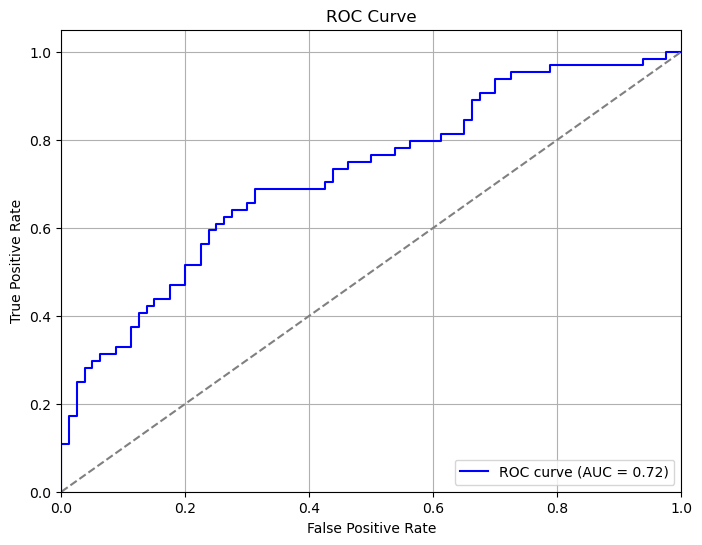

AUC: 0.72


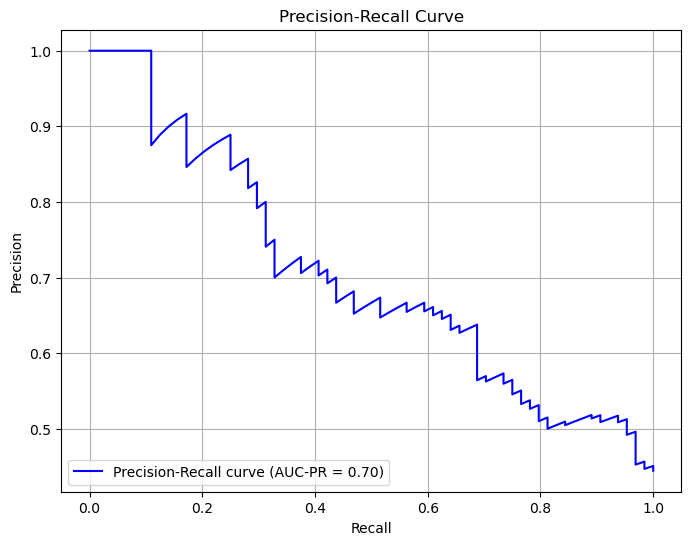

In [132]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Ajustar el pipeline al conjunto de entrenamiento
pipe.fit(X_train, y_train)

# Obtener las probabilidades de la clase positiva (1) para el conjunto de prueba
y_prob = pipe.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el AUC
auc_value = roc_auc_score(y_test, y_prob)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Imprimir el valor del AUC
print(f"AUC: {auc_value:.2f}")

# Calcular la curva Precision-Recall
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Calcular el AUC-PR
auc_pr = average_precision_score(y_test, y_prob)

# Graficar la curva Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'Precision-Recall curve (AUC-PR = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


In [113]:
# Definir el modelo XGBoost
xgb_model = XGBClassifier(learning_rate=0.3, max_depth=6, eval_metric=["error", "logloss"])

# Data preprocessing pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Transformar los datos
X_train_trans = my_pipeline.fit_transform(X_train)
X_test_trans = my_pipeline.transform(X_test)

# Entrenar el modelo XGBoost usando eval_set para las métricas de entrenamiento y prueba
eval_set = [(X_train_trans, y_train), (X_test_trans, y_test)]
xgb_model.fit(
    X_train_trans, y_train,
    eval_set=eval_set,
    verbose=False
)

# Visualizar el entrenamiento
plot_training(xgb_model, X_test_trans, y_test)

Accuracy: 67.36%


In [72]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Definir el modelo XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Definir el pipeline con el preprocesador y el modelo XGBoost
pipe = Pipeline([
    ('preprocessor', preprocessor),  # Preprocesador que creaste anteriormente
    ('classifier', xgb_model)        # Modelo de clasificación XGBoost
])

# Definir el espacio de búsqueda para los hiperparámetros
param_grid = {
    'classifier__n_estimators': [100, 200, 300],  # Número de árboles
    'classifier__learning_rate': [0.001, 0.01, 0.1],  # Tasa de aprendizaje
    'classifier__max_depth': [3, 5, 10, 25, 50, None],  # Profundidad máxima del árbol
    #'classifier__subsample': [0.8, 1.0],  # Subconjunto de muestras
    #'classifier__colsample_bytree': [0.8, 1.0],  # Subconjunto de características
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Entrenar el GridSearchCV para encontrar los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evaluar el modelo con los mejores hiperparámetros en el conjunto de prueba
train_and_evaluate(grid_search.best_estimator_, X_train, y_train, X_test, y_test, print_=True)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Matriz de confusión: 

[[20 44]
 [45 35]]

Reporte de Clasificación: 

              precision    recall  f1-score   support

           0       0.31      0.31      0.31        64
           1       0.44      0.44      0.44        80

    accuracy                           0.38       144
   macro avg       0.38      0.38      0.38       144
weighted avg       0.38      0.38      0.38       144

Tiempo de entrenamiento: 1.26 segundos


In [211]:
# Definir las métricas a calcular
scoring = ['f1_macro', 'accuracy', 'roc_auc']

# Validación cruzada con múltiples métricas
cv_results = cross_validate(pipe, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

# Mostrar resultados
print("F1-Score por fold:", cv_results['test_f1_macro'])
print("ROC-AUC por fold:", cv_results['test_roc_auc'])
print("Exactitud por fold:", cv_results['test_accuracy'])
print("Promedio F1-Score:", cv_results['test_f1_macro'].mean())
print("Promedio Exactitud:", cv_results['test_accuracy'].mean())

F1-Score por fold: [0.61161388 0.48231389 0.69604922 0.60784314 0.45723295]
ROC-AUC por fold: [0.69268477 0.50791855 0.75547866 0.6082276  0.5763168 ]
Exactitud por fold: [0.61165049 0.48543689 0.69607843 0.60784314 0.47058824]
Promedio F1-Score: 0.571010615058577
Promedio Exactitud: 0.5743194365124691


In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtener los nombres reales de las características después del preprocesamiento
feature_names = pipe.named_steps['preprocessor'].get_feature_names_out()

def plot_importance(model, feature_names, importance_type='weight', top_n=None):
    """
    Muestra las 'top_n' características más importantes del modelo con los nombres reales.
    
    Parameters:
    - model: El modelo XGBoost entrenado.
    - feature_names: Lista de nombres de las características después del preprocesamiento.
    - importance_type: Tipo de importancia (por defecto es 'weight').
    - top_n: Número de características que deseas mostrar. Si es None, se muestran todas.
    """
    # Obtener las importancias de las características
    importance_dict = model.get_booster().get_score(importance_type=importance_type)

    # Convertir las importancias a un DataFrame para facilitar la visualización
    importance_df = pd.DataFrame({
        'Feature': importance_dict.keys(),
        'Importance': importance_dict.values()
    }).sort_values(by='Importance', ascending=False)

    # Mapear las características codificadas a los nombres reales
    importance_df['Feature'] = importance_df['Feature'].map(lambda x: feature_names[int(x[1:])] if x[1:].isdigit() else x)

    # Seleccionar solo las 'top_n' características si se proporciona
    if top_n:
        importance_df = importance_df.head(top_n)

    # Graficar las importancias
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title(f'Top {top_n} Feature Importances' if top_n else 'Feature Importances')
    plt.gca().invert_yaxis()  # Invertir el eje y para tener la característica más importante en la parte superior
    plt.show()


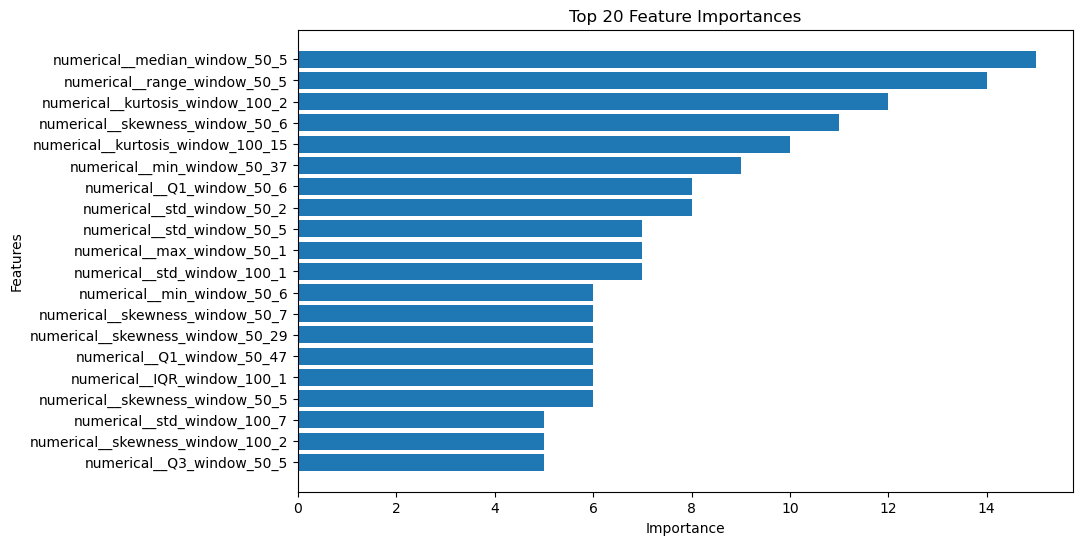

In [125]:
model = pipe.named_steps['classifier']
plot_importance(model, feature_names, importance_type='weight', top_n = 20)

In [130]:
# Obtener las importancias de las características
importance_dict = model.get_booster().get_score(importance_type='weight')

# Convertir las importancias a un DataFrame para facilitar la visualización
importance_df = pd.DataFrame({
    'Feature': importance_dict.keys(),
    'Importance': importance_dict.values()
    }).sort_values(by='Importance', ascending=False)

# Mapear las características codificadas a los nombres reales
importance_df['Feature'] = importance_df['Feature'].map(lambda x: feature_names[int(x[1:])] if x[1:].isdigit() else x)

importance_df.head(10)

,Feature,Importance
27,numerical__median_window_50_5,15.0
30,numerical__range_window_50_5,14.0
253,numerical__kurtosis_window_100_2,12.0
42,numerical__skewness_window_50_6,11.0
298,numerical__kurtosis_window_100_15,10.0
158,numerical__min_window_50_37,9.0
40,numerical__Q1_window_50_6,8.0
10,numerical__std_window_50_2,8.0
26,numerical__std_window_50_5,7.0
6,numerical__max_window_50_1,7.0


### Random Forest

In [212]:
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo
random_forest = RandomForestClassifier(random_state=27)

# Definir el pipeline (puedes agregar más pasos si es necesario)
pipe = Pipeline([
    ('preprocessor', preprocessor),  # Preprocesador que creaste anteriormente
    ('classifier', random_forest)    # Modelo de clasificación
])

# Entrenar y evaluar
train_and_evaluate(pipe, X_train, y_train, X_test, y_test)

Matriz de confusión: 

[[47 33]
 [30 34]]

Reporte de Clasificación: 

              precision    recall  f1-score   support

           0       0.61      0.59      0.60        80
           1       0.51      0.53      0.52        64

    accuracy                           0.56       144
   macro avg       0.56      0.56      0.56       144
weighted avg       0.56      0.56      0.56       144

Tiempo de entrenamiento: 0.51 segundos


In [218]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Definir el pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),  # Preprocesador
    ('classifier', rf_model)         # Modelo RandomForest
])

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'classifier__n_estimators': [100, 200, 300],  # Número de árboles
    'classifier__max_depth': [10, 20, 30],        # Profundidad máxima del árbol
    'classifier__min_samples_split': [2, 5, 10],  # Mínimas muestras para dividir un nodo
    'classifier__min_samples_leaf': [1, 2, 4],    # Mínimas muestras en una hoja
    'classifier__bootstrap': [True, False]        # Método de muestreo
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Entrenar el GridSearchCV para encontrar los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evaluar el modelo con los mejores hiperparámetros en el conjunto de prueba
train_and_evaluate(grid_search.best_estimator_, X_train, y_train, X_test, y_test, print_=True)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Mejores hiperparámetros encontrados:
{'classifier__bootstrap': True, 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Matriz de confusión: 

[[17 47]
 [52 28]]

Reporte de Clasificación: 

              precision    recall  f1-score   support

           0       0.25      0.27      0.26        64
           1       0.37      0.35      0.36        80

    accuracy                           0.31       144
   macro avg       0.31      0.31      0.31       144
weighted avg       0.32      0.31      0.31       144

Tiempo de entrenamiento: 0.43 segundos


In [179]:
# Definir las métricas a calcular
scoring = ['f1_macro', 'accuracy', 'roc_auc']

# Validación cruzada con múltiples métricas
cv_results = cross_validate(pipe, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

# Mostrar resultados
print("F1-Score por fold:", cv_results['test_f1_macro'])
print("ROC-AUC por fold:", cv_results['test_roc_auc'])
print("Exactitud por fold:", cv_results['test_accuracy'])
print("Promedio F1-Score:", cv_results['test_f1_macro'].mean())
print("Promedio Exactitud:", cv_results['test_accuracy'].mean())

F1-Score por fold: [0.66736322 0.5238829  0.64487427 0.50676983 0.49404762]
ROC-AUC por fold: [0.72963801 0.50131976 0.76009227 0.54459823 0.58304498]
Exactitud por fold: [0.66990291 0.53398058 0.64705882 0.50980392 0.50980392]
Promedio F1-Score: 0.5673875676553283
Promedio Exactitud: 0.5741100323624595


### SVM

In [213]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Definir el modelo
svm_model = SVC(probability=True, random_state=42)

pipe = Pipeline([
    ('preprocessor', preprocessor),  # Preprocesador
    ('classifier', svm_model)        # Modelo SVM
])

# Entrenar y evaluar
train_and_evaluate(pipe, X_train, y_train, X_test, y_test)

Matriz de confusión: 

[[48 32]
 [31 33]]

Reporte de Clasificación: 

              precision    recall  f1-score   support

           0       0.61      0.60      0.60        80
           1       0.51      0.52      0.51        64

    accuracy                           0.56       144
   macro avg       0.56      0.56      0.56       144
weighted avg       0.56      0.56      0.56       144

Tiempo de entrenamiento: 0.12 segundos


In [181]:
# Definir las métricas a calcular
scoring = ['f1_macro', 'accuracy', 'roc_auc']

# Validación cruzada con múltiples métricas
cv_results = cross_validate(pipe, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

# Mostrar resultados
print("F1-Score por fold:", cv_results['test_f1_macro'])
print("ROC-AUC por fold:", cv_results['test_roc_auc'])
print("Exactitud por fold:", cv_results['test_accuracy'])
print("Promedio F1-Score:", cv_results['test_f1_macro'].mean())
print("Promedio Exactitud:", cv_results['test_accuracy'].mean())

F1-Score por fold: [0.73697153 0.50014273 0.6619883  0.43137255 0.3980464 ]
ROC-AUC por fold: [0.79487179 0.50452489 0.73010381 0.43675509 0.544406  ]
Exactitud por fold: [0.73786408 0.50485437 0.66666667 0.43137255 0.43137255]
Promedio F1-Score: 0.5457043034434368
Promedio Exactitud: 0.5544260422615649


In [89]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Definir el modelo SVC
svm_model = SVC(probability=True, random_state=42)

# Definir el pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),  # Preprocesador
    ('classifier', svm_model)        # Modelo SVM
])

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],          # Parámetro de regularización
    'classifier__kernel': ['linear', 'rbf'],     # Tipo de kernel
    'classifier__gamma': ['scale', 'auto'],      # Parámetro del kernel RBF
    'classifier__degree': [2, 3, 4]              # Solo si se usa kernel polinómico
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Entrenar el GridSearchCV para encontrar los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evaluar el modelo con los mejores hiperparámetros en el conjunto de prueba
train_and_evaluate(grid_search.best_estimator_, X_train, y_train, X_test, y_test, print_=True)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Mejores hiperparámetros encontrados:
{'classifier__C': 1, 'classifier__degree': 2, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Matriz de confusión: 

[[27 37]
 [54 26]]

Reporte de Clasificación: 

              precision    recall  f1-score   support

           0       0.33      0.42      0.37        64
           1       0.41      0.33      0.36        80

    accuracy                           0.37       144
   macro avg       0.37      0.37      0.37       144
weighted avg       0.38      0.37      0.37       144

Tiempo de entrenamiento: 0.23 segundos
